<h1><center>Optimizacion con Machine Learning</center></h1>

En este ejericcio, se optimizara un modelo de aprendizaje automatico. Primero se entrena el modelo y posteriormente se calculan la entradas optmias.

In [17]:
import numpy as np
from matplotlib import pyplot as plt

#Modelo red neuronal multicapa para regresion
from sklearn.neural_network import MLPRegressor
#Divide los datos en entrenamiento y validacion
from sklearn.model_selection import train_test_split

#Metodo de optimizacion
from scipy.optimize import fmin,fmin_bfgs, Bounds, minimize

In [18]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def scale(X, scaleInput):
    # scale Input values to range [-1,1] in each dimension
    if (scaleInput):
        nom = (X -  X.min(axis=0))*2
        denom = X.max(axis=0) - X.min(axis=0)
        denom[denom==0] = 1
        return -1 + nom/denom
    else:
        return X

def normalize(y, normalizeOutput):
    # normalize output to z-score
    if(normalizeOutput):
        y_norm = (y - np.mean(y, axis=0))/np.std(y, axis=0);
        return y_norm
    else:
        return y

In [19]:
!wget https://raw.githubusercontent.com/cgl-itm/Optimizacion-ITM/main/notebooks/peaks.csv

--2023-11-14 20:48:45--  https://raw.githubusercontent.com/cgl-itm/Optimizacion-ITM/main/notebooks/peaks.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59251 (58K) [text/plain]
Saving to: ‘peaks.csv’

peaks.csv           100%[===================>]  57.86K  --.-KB/s    in 0.005s  

2023-11-14 20:48:45 (12.2 MB/s) - ‘peaks.csv’ saved [59251/59251]



In [20]:
############################ LOAD DATA ############################
# enter data set information
problem_name = "peaks"
# enter file name of training data -
filename_data = "peaks.csv"
# dimensionality of the data
input_dim = 2
output_dim = 1
# scale Input to [-1,1] range
scaleInput = True
# normalize Output to z-score
normalizeOutput = False # was true

data = np.loadtxt(open(filename_data, "rb"), delimiter=",")
X = data[:, :-output_dim]
y = data[:, input_dim:]
X_norm = scale(X, scaleInput)
y_norm = normalize(y, normalizeOutput)
x_train, x_val, y_train, y_val = train_test_split(X_norm, y_norm, test_size=0.15)
n_train = x_train.shape[0]

In [21]:
data

array([[-3.0000e+00, -3.0000e+00,  6.6713e-05],
       [-2.8776e+00, -3.0000e+00,  1.2490e-04],
       [-2.7551e+00, -3.0000e+00,  2.2533e-04],
       ...,
       [ 2.7551e+00,  3.0000e+00,  1.6419e-04],
       [ 2.8776e+00,  3.0000e+00,  8.3283e-05],
       [ 3.0000e+00,  3.0000e+00,  4.1030e-05]])

In [22]:
# training of artificial neural network
regr = MLPRegressor(random_state=1, max_iter=50000, activation='relu', hidden_layer_sizes=(10,10,10), solver='lbfgs')\
                   .fit(x_train, np.ravel(y_train))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
print('R2 for validation data of ANN is: ', regr.score(x_val, y_val))
print('R2 for validation data of ANN is: ', regr.score(x_train, y_train))

R2 for validation data of ANN is:  0.9876092557317983
R2 for validation data of ANN is:  0.9899369847622644


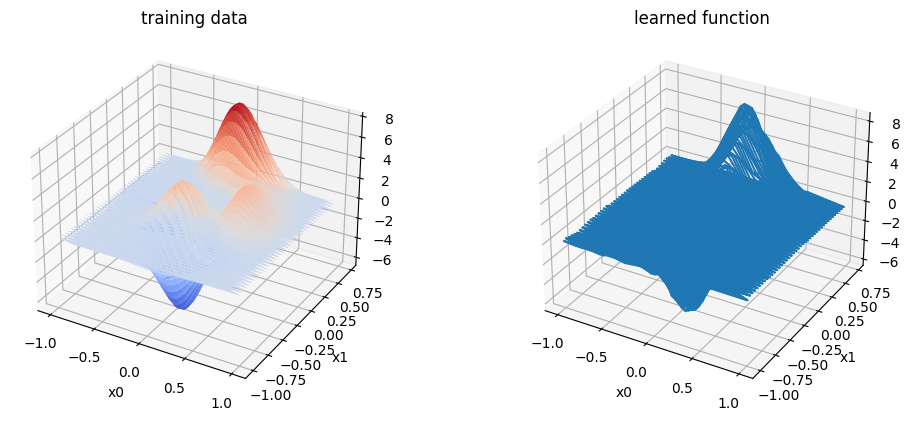

In [ ]:
# plotting
y_pred = regr.predict(X_norm)
n_rt = np.sqrt(n_train).astype(int)
X = np.zeros((n_rt, n_rt))
Y = np.zeros((n_rt, n_rt))
Z_true = np.zeros((n_rt, n_rt))
Z_pred = np.zeros((n_rt, n_rt))
for i in range(n_rt):
    for j in range(n_rt):
        X[i, j] = X_norm[i * n_rt + j, 0]
        Y[i, j] = X_norm[i * n_rt + j, 1]
        Z_true[i, j] = y_norm[i * n_rt + j]
        Z_pred[i, j] = y_pred[i * n_rt + j]

fig = plt.figure(figsize=plt.figaspect(0.4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
cmap = plt.get_cmap('coolwarm')
ax.plot_surface(X, Y, Z_true, cmap=cmap)
ax.set_title('training data')
ax.set_xlabel('x0')
ax.set_ylabel('x1')

ax = fig.add_subplot(1, 2, 2, projection='3d')
cmap = plt.get_cmap('coolwarm')
ax.plot_wireframe(X, Y, Z_pred, cmap=cmap)
ax.set_title('learned function')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
plt.show()


In [ ]:
regr.predict(np.array([[-1,-1]]))
X_norm[0]

array([-1., -1.])

In [ ]:
X[np.argmin(y),:],np.argmin(y)

(array([ 0.18367, -1.6531 ]), 576)

In [ ]:
def objective_function(x):
    return regr.predict(x.reshape(-1,2))

In [ ]:
# optimize embedded ANN model with different initial guesses
bnds = Bounds(-1.0, 1.0)
x0 = np.array([0, 0])
solLBD = minimize(objective_function, x0, bounds = bnds, method='L-BFGS-B')
print('local optimum for x0=', x0, 'is : ', solLBD.fun)

x0 = np.array([-0.750, -0.750])
solLBD = minimize(objective_function, x0, bounds = bnds, method='L-BFGS-B')
print('local optimum for x0=', x0, 'is : ', solLBD.fun)

x0 = np.array([-1, -1])
solLBD = minimize(objective_function, x0, bounds = bnds, method='L-BFGS-B')
print('local optimum for x0=', x0, 'is : ', solLBD.fun)

x0 = np.array([0, 1])
solLBD = minimize(objective_function, x0, bounds = bnds, method='L-BFGS-B')
print('local optimum for x0=', x0, 'is : ', solLBD.fun)

x0 = np.array([1, 1])
solLBD = minimize(objective_function, x0, bounds = bnds, method='L-BFGS-B')
print('local optimum for x0=', x0, 'is : ', solLBD.fun)

x0 = np.array([1, -1])
solLBD = minimize(objective_function, x0, bounds = bnds, method='L-BFGS-B')
print('local optimum for x0=', x0, 'is : ', solLBD.fun)

x0 = np.array([0, -0.7])
solLBD = minimize(objective_function, x0, bounds = bnds, method='L-BFGS-B')
print('local optimum for x0=', x0, 'is : ', solLBD.fun)

local optimum for x0= [0 0] is :  [-0.02908517]
local optimum for x0= [-0.75 -0.75] is :  [0.01120344]
local optimum for x0= [-1 -1] is :  [0.01120344]
local optimum for x0= [0 1] is :  [-0.04042995]
local optimum for x0= [1 1] is :  [-0.02908517]
local optimum for x0= [ 1 -1] is :  [-6.89022989]
local optimum for x0= [ 0.  -0.7] is :  [-6.86196617]


Observamos que para diferntes inicializaciones, se obtienen diferentes puntos optimos. Debido que los optimizadores dicen haber encontrado la solucion optima, concluimos que el modelo aproximado es no convexo y tiene varios optimos locales. Solo empleando optimizacion global, podemos garantizar que se ha encontrado el minimo global.